In [119]:
path= r"D:\Asus\Documents\retail_clean (1).csv"

In [120]:
import pandas as pd

In [121]:
retail= pd.read_csv(path,index_col='Unnamed: 0')

In [122]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [123]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779495 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  int64  
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  int64  
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  float64
 7   Country      779495 non-null  object 
 8   Revenue      779495 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 59.5+ MB


In [124]:
dates=retail['InvoiceDate'].str.split(' ', expand= True)

In [125]:
dates[0]

0          2009-12-01
1          2009-12-01
2          2009-12-01
3          2009-12-01
4          2009-12-01
              ...    
1067366    2011-12-09
1067367    2011-12-09
1067368    2011-12-09
1067369    2011-12-09
1067370    2011-12-09
Name: 0, Length: 779495, dtype: object

In [126]:
retail['InvDate']= pd.to_datetime(dates[0])

In [127]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Invoice,779495.0,537427.005391,26901.961110,489434.0,514483.00,536754.00,562002.00,581587.0
Quantity,779495.0,13.507085,146.540284,1.0,2.00,6.00,12.00,80995.0
Price,779495.0,3.218199,29.674823,0.0,1.25,1.95,3.75,10953.5
Customer ID,779495.0,15320.262918,1695.722988,12346.0,13971.00,15246.00,16794.00,18287.0
Revenue,779495.0,22.289821,227.416962,0.0,4.95,12.48,19.80,168469.6


In [128]:
retail['Daysof Week']=pd.to_datetime(retail['InvDate']).dt.dayofweek

In [129]:
retail['Daysof Week'].value_counts()

3    156012
1    134028
2    130782
6    130141
0    124957
4    103175
5       400
Name: Daysof Week, dtype: int64

In [130]:
import seaborn as sns

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daysof Week', ylabel='count'>

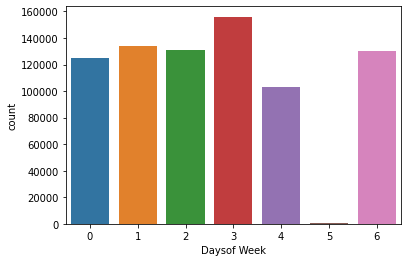

In [131]:
sns.countplot(retail['Daysof Week'])

In [132]:
# retail['Inv Date']= pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y-%M-%D')

In [133]:
grouped_retail=retail.groupby(['Description','InvDate']).agg(totes_sales=('Quantity','sum')).reset_index()

In [134]:
grouped_retail

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [135]:
cv_data= grouped_retail.groupby('Description').agg(average=('totes_sales','mean'), sd= ('totes_sales', 'std')).reset_index()

In [136]:
cv_data

,Description,average,sd
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112
4,ANIMAL STICKERS,32.083333,11.758620
...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700
5280,ZINC WILLIE WINKIE CANDLE STICK,21.116438,23.437864
5281,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549


In [137]:
grouped_retail

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,5
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,2
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


In [138]:
cv_data['coeff_var_sq']= (cv_data['sd']/cv_data['average'])**2

In [139]:
cv_data

,Description,average,sd,coeff_var_sq
0,DOORMAT UNION JACK GUNS AND ROSES,6.958333,7.865606,1.277774
1,3 STRIPEY MICE FELTCRAFT,11.220339,14.247889,1.612460
2,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,2.171124
3,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,3.121036
4,ANIMAL STICKERS,32.083333,11.758620,0.134324
...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,36.522388,46.825017,1.643757
5279,ZINC TOP 2 DOOR WOODEN SHELF,5.902439,7.598700,1.657355
5280,ZINC WILLIE WINKIE CANDLE STICK,21.116438,23.437864,1.231955
5281,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549,1.004444


In [140]:
prod_bydate=retail.groupby(['Description','InvDate']).agg(totes_sales=('Description','count')).reset_index()

In [141]:
skus= prod_bydate['Description'].unique()

In [142]:
skus

array(['  DOORMAT UNION JACK GUNS AND ROSES', ' 3 STRIPEY MICE FELTCRAFT',
       ' 4 PURPLE FLOCK DINNER CANDLES', ...,
       'ZINC WILLIE WINKIE  CANDLE STICK', 'ZINC WIRE KITCHEN ORGANISER',
       'ZINC WIRE SWEETHEART LETTER TRAY'], dtype=object)

In [143]:
prod_bydate

,Description,InvDate,totes_sales
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1
...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1


<AxesSubplot:xlabel='totes_sales', ylabel='Count'>

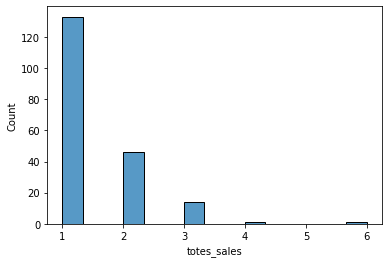

In [146]:
sns.histplot(prod_bydate[prod_bydate['Description']=='DOORMAT UNION JACK GUNS AND ROSES']['totes_sales'])

<IPython.core.display.Javascript object>

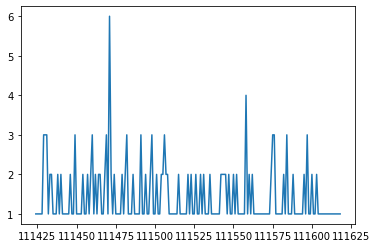

In [148]:
plt.plot(prod_bydate[prod_bydate['Description']=='DOORMAT UNION JACK GUNS AND ROSES']['totes_sales'])

In [149]:
prod_bydate['Prev_Date']= prod_bydate['InvDate'].shift(1)

In [151]:
prod_bydate

,Description,InvDate,totes_sales,Prev_Date
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,NaT
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3,2010-01-05
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1,2010-01-08
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2,2010-01-10
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11
...,...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2,2011-10-27
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1,2011-11-18
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1,2011-11-23
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1,2011-11-24


In [152]:
prod_bydate['inter_order_time']= prod_bydate['InvDate']-prod_bydate['Prev_Date']

In [157]:
(prod_bydate['inter_order_time']).astype('string').str.split(" ", expand=True)[0]

0         <NA>
1            3
2            2
3            1
4            1
          ... 
440441      22
440442       5
440443       1
440444       6
440445       7
Name: 0, Length: 440446, dtype: string

In [158]:
prod_bydate['Inter_Order_Times']= (prod_bydate['inter_order_time']).astype('string').str.split(" ", expand=True)[0]

In [166]:
prod_bydate['Days']= [None]* prod_bydate.shape[0]

In [167]:
prod_bydate

,Description,InvDate,totes_sales,Prev_Date,inter_order_time,Inter_Order_Times,Days
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,NaT,NaT,<NA>,None
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,3,2010-01-05,3 days,3,None
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,1,2010-01-08,2 days,2,None
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,2,2010-01-10,1 days,1,None
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,2010-01-11,1 days,1,None
...,...,...,...,...,...,...,...
440441,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-18,2,2011-10-27,22 days,22,None
440442,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-23,1,2011-11-18,5 days,5,None
440443,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-24,1,2011-11-23,1 days,1,None
440444,ZINC WIRE SWEETHEART LETTER TRAY,2011-11-30,1,2011-11-24,6 days,6,None


In [168]:
prod_bydate['Days'][1:]=prod_bydate['Inter_Order_Times'][1:]

<ipython-input-168-c8e79b9f0d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_bydate['Days'][1:]=prod_bydate['Inter_Order_Times'][1:]


In [180]:
prod_bydate['Days']=prod_bydate['Days'].astype('int', errors='ignore')

In [181]:
prod_bydate['Days'].dtypes

dtype('O')

In [186]:
prod_bydate['Days']=pd.to_numeric(prod_bydate['Days'], errors= 'coerce')

In [187]:
prod_bydate['Days'].dtypes

dtype('float64')

In [197]:
cv_data['ADI']=  prod_bydate.groupby('Description').agg(ADI= ('Days','mean')).values


In [200]:
cv_data['ADI'].dtypes

dtype('float64')